In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dense
import seaborn as sns
from tensorflow.keras.models import save_model
from tensorflow.math import confusion_matrix

2024-11-26 04:16:58.480305: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-26 04:16:58.484916: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-26 04:16:58.594739: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-26 04:16:58.654806: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-26 04:16:58.748352: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [4]:
directory = '/home/shrivastavahs/python/data'
categories = ['withMask','withoutMask']

In [3]:
Image_size = 100
data = []
for category in categories:
    label = categories.index(category)
    folder = os.path.join(directory,category)
    for img_name in os.listdir(folder):
        image_path = os.path.join(folder,img_name)
        image = cv2.imread(image_path)
        if image is not None:
            resized_image = cv2.resize(image,(Image_size,Image_size))
            data.append([resized_image,label])

In [4]:
twoindices = []
has = False
nothave = False
index = 0
for feature, label in data:
    if has == False and label == 0:
        twoindices.append(index)
        has = True
    elif nothave == False and label == 1:
        twoindices.append(index)
        nothave = True
    if has == True and nothave == True:
        break
    index += 1

masked


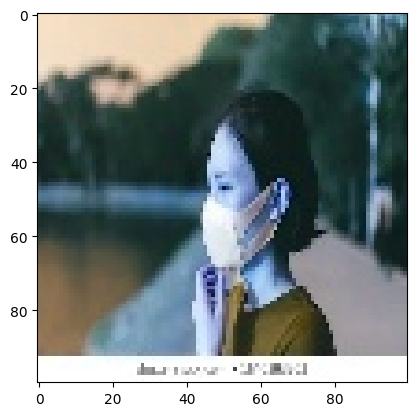

not masked


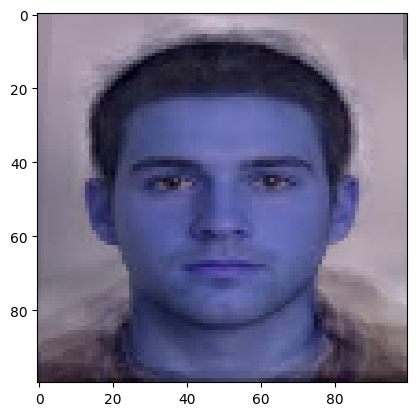

In [5]:
for index in twoindices:
    print('not masked' if data[index][1] == 1 else 'masked')
    plt.imshow(data[index][0])
    plt.show()

In [6]:
random.shuffle(data)

In [7]:
X = []
Y = []
for feature, label in data:
    X.append(feature)
    Y.append(label)

In [8]:
print(f'X:{len(X)}, Y:{len(Y)}')

X:7553, Y:7553


In [9]:
Y = np.array(Y)
X = np.array(X)
print(X.shape)
print(Y.shape)

(7553, 100, 100, 3)
(7553,)


In [10]:
# Scaling images values
X = X/255

masked


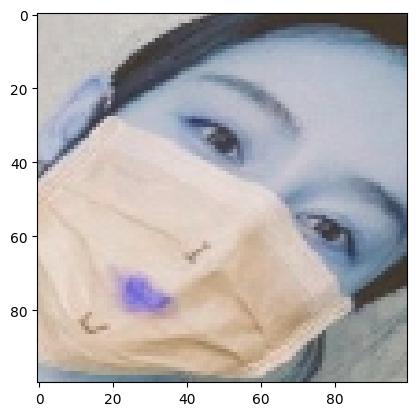

not masked


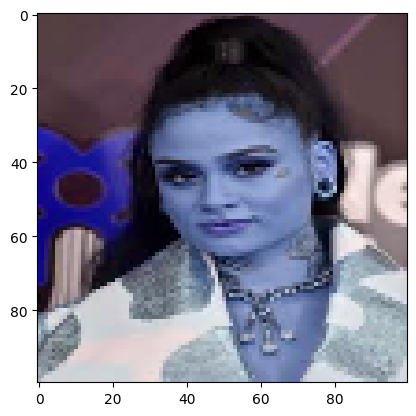

masked


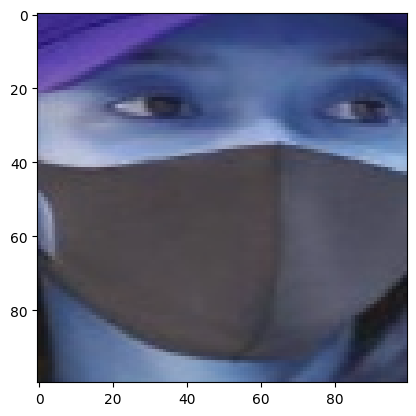

not masked


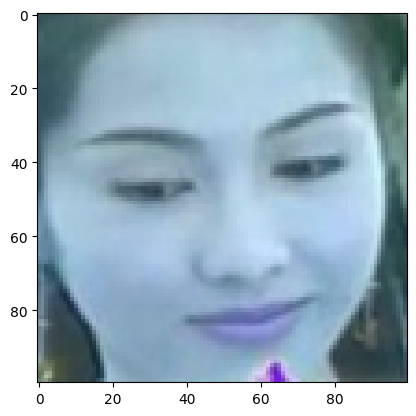

masked


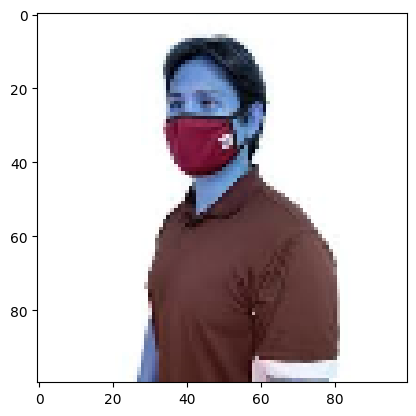

In [11]:
for i in range(5):
    print('masked' if Y[i] == 0 else 'not masked')
    plt.imshow(X[i])
    plt.show()

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.98,random_state=2)
print(X.shape,x_train.shape,x_test.shape)
print(Y.shape,y_train.shape,y_test.shape)

(7553, 100, 100, 3) (7401, 100, 100, 3) (152, 100, 100, 3)
(7553,) (7401,) (152,)


In [13]:
Input_size = (Image_size,Image_size,3)
Num_classes = 2

Model = Sequential([
    Input(shape=Input_size),
    Conv2D(32,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),

    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(Num_classes,activation='softmax')
])

In [14]:
Model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
result = Model.fit(x_train,y_train,validation_split=0.1,epochs=7)

Epoch 1/7
209/209 ━━━━━━━━━━━━━━━━━━━━ 26s 119ms/step - accuracy: 0.7912 - loss: 0.4985 - val_accuracy: 0.9217 - val_loss: 0.2057
Epoch 2/7
209/209 ━━━━━━━━━━━━━━━━━━━━ 25s 117ms/step - accuracy: 0.9076 - loss: 0.2325 - val_accuracy: 0.9258 - val_loss: 0.2113
Epoch 3/7
209/209 ━━━━━━━━━━━━━━━━━━━━ 24s 117ms/step - accuracy: 0.9440 - loss: 0.1541 - val_accuracy: 0.9474 - val_loss: 0.1425
Epoch 4/7
209/209 ━━━━━━━━━━━━━━━━━━━━ 25s 117ms/step - accuracy: 0.9608 - loss: 0.1051 - val_accuracy: 0.9312 - val_loss: 0.1974
Epoch 5/7
209/209 ━━━━━━━━━━━━━━━━━━━━ 24s 116ms/step - accuracy: 0.9767 - loss: 0.0642 - val_accuracy: 0.9285 - val_loss: 0.1772
Epoch 6/7
209/209 ━━━━━━━━━━━━━━━━━━━━ 25s 117ms/step - accuracy: 0.9699 - loss: 0.0796 - val_accuracy: 0.9447 - val_loss: 0.1784
Epoch 7/7
209/209 ━━━━━━━━━━━━━━━━━━━━ 25s 117ms/step - accuracy: 0.9906 - loss: 0.0301 - val_accuracy: 0.8812 - val_loss: 0.4619


In [16]:
evaluation = Model.evaluate(x_test,y_test)
print("the loss value is: ",evaluation[0])
print("the accuracy value is: ",evaluation[1])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9264 - loss: 0.3826
the loss value is:  0.30926740169525146
the accuracy value is:  0.9144737124443054


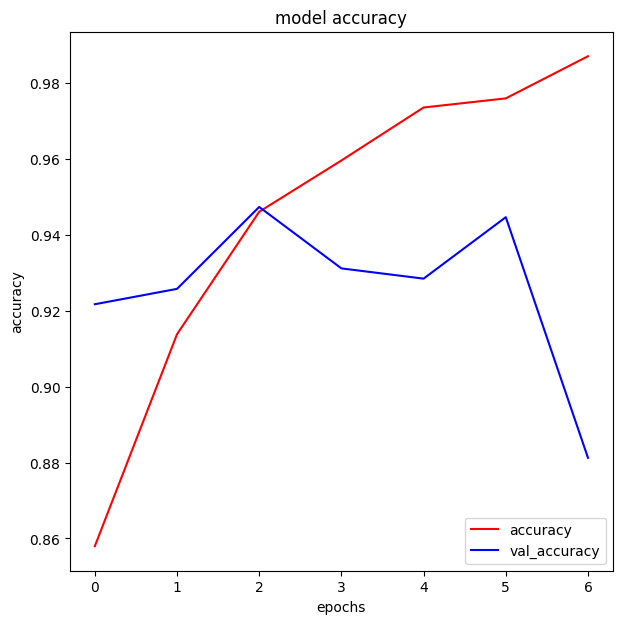

In [17]:
plt.figure(figsize=(7,7))
plt.plot(result.history['accuracy'],color='red')
plt.plot(result.history['val_accuracy'],color='blue')
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy','val_accuracy'],loc='lower right')

In [18]:
predicted_y = Model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [19]:
y_predicted_values = []
for value in predicted_y:
    y_predicted_values.append(np.argmax(value))
comparison = []
for predicted_value,true_value in zip(y_predicted_values,y_test):
    comparison.append([predicted_value,true_value])
print(comparison)

[[0, 0], [1, 1], [0, 0], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [1, 0], [1, 1], [1, 1], [0, 0], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 0], [1, 1], [0, 0], [0, 0], [1, 1], [0, 0], [1, 1], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [1, 0], [1, 1], [1, 1], [0, 0], [0, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [0, 0], [1, 1], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [1, 1], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [1, 1], [1, 1], [0, 0], [1, 1], [0, 0], [1, 1], [0, 0], [0, 0], [1, 1], [1, 1], [1, 1], [0, 0], [1, 1], [0, 0], [1, 1], [0, 1], [1, 1], [0, 0], [1, 1], [1, 1], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [1, 1], [1, 1], [1, 0], [1, 1], [1, 0], [1, 1], [0, 0], [0, 0], [1, 0], [0, 0], [1, 1], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [0, 0], [1, 1], [1, 1], [0, 0], [1, 1], [1, 1], [1, 1], [0, 0], [1, 0], [0, 0], [0, 0], [1, 0], [1, 0], [1, 1], [0, 0],

In [20]:
print(len(comparison))

152


<Axes: >

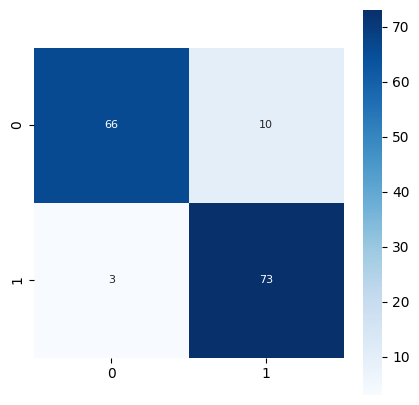

In [21]:
plt.figure(figsize=(5,5))
conf_matrix = confusion_matrix(y_test,y_predicted_values)
sns.heatmap(conf_matrix,square=True,cbar=True,annot=True,annot_kws={'size':8},cmap='Blues')

In [22]:
def detect_mask(image_path):
    image = cv2.imread(image_path)
    if image.shape[-1] == 1:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    resized_image = cv2.resize(image,(Image_size,Image_size))
    resized_image = resized_image / 255
    prediction = Model.predict(np.expand_dims(resized_image, axis=0))
    print(prediction)
    predicted_class = ['Masked','Not Masked'][np.argmax(prediction)]
    print(predicted_class)

In [23]:
detect_mask('/home/shrivastavahs/python/hima_with.jpeg')
detect_mask('/home/shrivastavahs/python/hima.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[1.000000e+00 4.612246e-08]]
Masked
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.00259772 0.9974023 ]]
Not Masked


In [24]:
Model.save('model.h5')


Failed to grab frame
